In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [44]:
DATA_PATH = '../data/fer2013.csv'
OUTPUT_PATH = '../dataset/fer2013'
os.makedirs(OUTPUT_PATH, exist_ok=True)

In [15]:
emotions = { #list of available emotions in the dataset
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Sad",
    5:"Surprize",
    6:"Neutral"
}

In [4]:
def load_csv():
    try:
        if os.path.exists(DATA_PATH):
            df = pd.read_csv(DATA_PATH)
            return df
    except Exception as e:
        raise FileNotFoundError(
            f"Error occurred during data download: {str(e)}")

In [6]:
df = load_csv()

In [8]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [50]:
type(df['pixels'])

pandas.core.series.Series

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [9]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [12]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [10]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [19]:
emotions_count = df['emotion'].value_counts()
emotions_count.index = emotions_count.index.map(emotions)
emotions_count

Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprize    4002
Disgust      547
Name: emotion, dtype: int64

In [41]:
def visualize_emotions(n=4):
    i = np.random.randint(0, df.shape[0], n)
    plt.figure(figsize=(15, 15))
    for j, idx in enumerate(i):
        plt.subplot(n//4+1, 4, j+1)
        img = np.array(df['pixels'][idx].split(' ')).astype('int').reshape(48, 48)
        plt.imshow(img, cmap='gray')
        plt.title(emotions[df['emotion'][idx]])
        plt.axis('off')
    

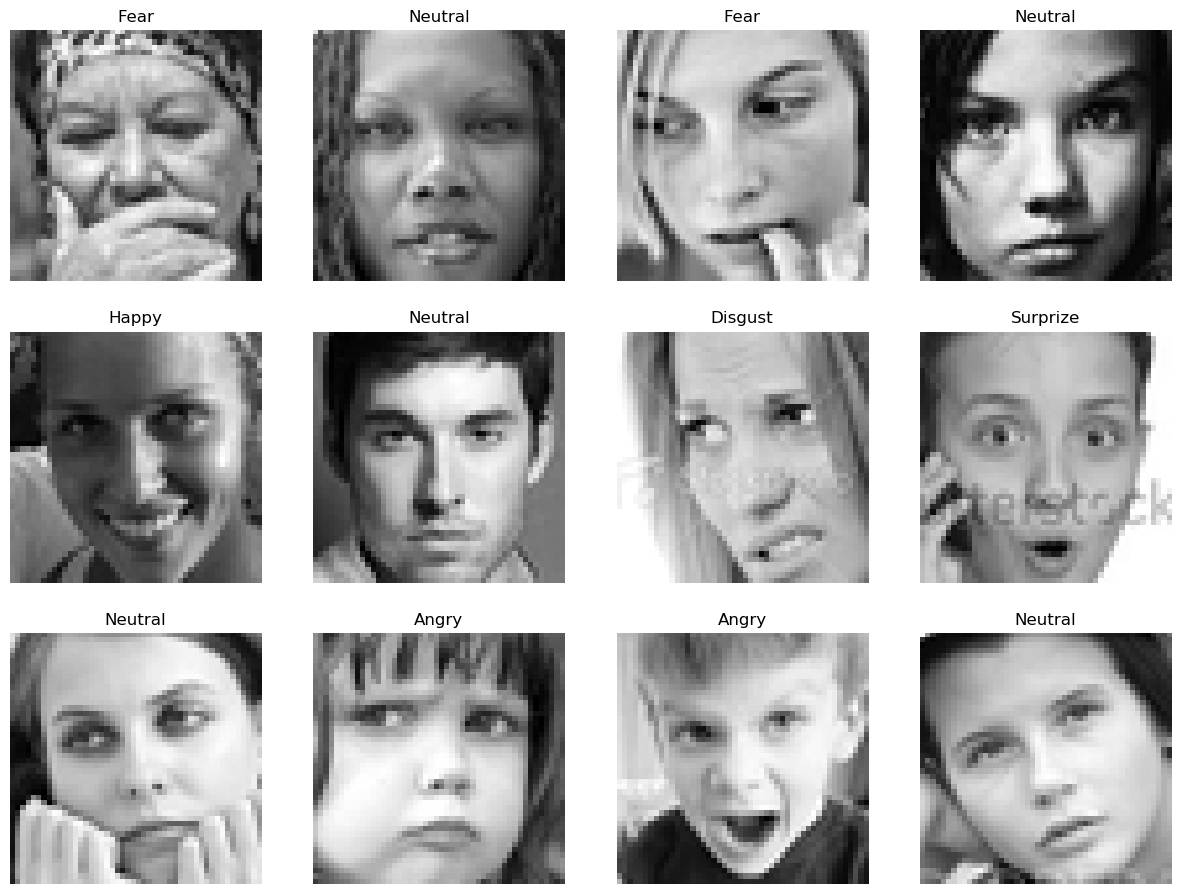

In [47]:
visualize_emotions(12)

In [45]:
def organize_data():
    train_dir = os.path.join(OUTPUT_PATH, 'train/')
    val_dir = os.path.join(OUTPUT_PATH, 'val/')
    test_dir = os.path.join(OUTPUT_PATH, 'test/')
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    train = df[df['Usage'] == 'Training']
    test = df[df['Usage'] == 'PublicTest']
    val = df[df['Usage'] == 'PrivateTest']
    
    train.to_csv(os.path.join(train_dir, 'train.csv'), index=False)
    test.to_csv(os.path.join(test_dir, 'test.csv'), index=False)
    val.to_csv(os.path.join(val_dir, 'val.csv'), index=False)

In [46]:
organize_data()